In [2]:
import numpy as np

x = np.array([1,2,3])
x.__class__, type(x)

(numpy.ndarray, numpy.ndarray)

In [3]:
x.shape, x.ndim

((3,), 1)

# Affine 

In [9]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
    
    def forward(self, x):
        W, b = self.params
        out = np.matmul(x, W) + b
        return out
    
class Sigmoid:
    def __init__(self):
        self.params = []
    
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

# TwoLayerNet

In [10]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 가중치                  
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        # 계층 생성
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        # 모든 가중치를 리스트엥 모은다.
        self.params = []        
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return(x)

In [8]:
np.random.randn(3, 2)

array([[-0.79769828,  1.41678551],
       [ 0.11756655,  0.76527941],
       [-0.62248003,  2.15148499]])

In [13]:
test = TwoLayerNet(10, 20, 2)
test.layers

test.params

[array([[-8.49562035e-01, -1.68303559e+00, -2.33289236e+00,
         -1.57356522e+00,  1.86408104e-01, -1.00253898e+00,
         -1.79471707e-01,  1.75905948e+00, -1.71230385e+00,
         -1.17568012e-01, -2.70702338e-01,  2.01616395e+00,
         -1.59536718e-01,  2.86193608e-01, -1.53528858e+00,
          1.20869485e+00, -8.20095810e-01, -1.03063776e-01,
         -1.68985959e-01, -7.44718686e-01],
        [ 4.04990202e-01,  1.29406719e-01,  2.28080225e-01,
         -1.10470229e+00,  1.09215646e+00,  4.16187876e-01,
         -1.15120719e+00,  1.93545249e-01, -1.68426021e+00,
         -1.74018660e+00,  2.20558282e-03, -1.69428021e-01,
          2.76344413e-02, -5.06944600e-01, -1.39438768e+00,
         -3.93160507e-01,  5.47011018e-01, -3.48827665e-01,
          6.05442584e-01,  4.84565163e-01],
        [-1.75558070e+00, -4.48288933e-01,  2.24205784e-01,
         -7.48444423e-01, -1.65462555e+00,  3.76596005e-01,
         -1.14666536e+00, -6.59799119e-01, -1.31399377e+00,
          5.

In [19]:
x = np.random.randn(10,10)
test.predict(x)

array([[-0.78535548, -4.14819133],
       [ 2.70281495, -1.0096352 ],
       [ 0.46966541, -2.17226365],
       [-0.55759401,  1.69854897],
       [ 4.524021  , -3.06594828],
       [ 5.3170926 , -1.14514803],
       [ 3.99476397, -3.36965465],
       [ 3.74298166, -2.63346535],
       [-2.01153852, -0.55238749],
       [-2.12992766, -0.79379346]])

# spiral data

In [21]:
import sys
sys.path.append('..')
from dataset import spiral
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

x (300, 2)
t (300, 3)


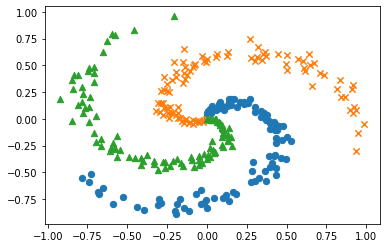

In [34]:
# 데이터점 플롯
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()